# Dataset
- Only human sensors
- Drop all rows with at least one NaN entry (S1-ADL1 S1-ADL2 S1-ADL3 S1-ADL4 S1-ADL5 S1-Drill S2-ADL1 S2-Drill S4-ADL4)
- Segmentation w=24, s=12 results in 17936 train, 3183 validation and 5145 test samples
- Normalize to mean=0.5 variance=1
- Additive noise (mu=0, sigma=0.01)

In [1]:
import matplotlib.pyplot as plt
import incense
from common.helper.config import parseMongoConfig
import pandas as pd
import numpy as np
loader = incense.ExperimentLoader(**parseMongoConfig('../config.ini', adapt='IncenseExperimentLoader'))
query = {
  '$and': [
    { 'experiment.name': 'CNN-IMU_Opportunity-Locomotion' },
    { 'status' : 'COMPLETED'},
  ]
}
experiments = loader.find(query)
print(f'Considering Experiments: {[e.to_dict()["_id"] for e in experiments]}')

Considering Experiments: [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 171, 173, 174, 175, 176, 177, 178, 179, 180]


# Best Model ($\mathcal{w}F_1$)

ID  = 173
wf1 = 0.873
acc = 0.874
Config: {'weight_decay': 0, 'seed': 282312553, 'loss_patience': 32, 'batch_size': 64, 'cnn_imu_fc_features': 256, 'cnn_imu_weight_initialization': 'orthogonal', 'stride': 12, 'validation_interval': 0.2, 'optimizer': 'Adam', 'blank_invalid_columns': True, 'cnn_imu_channels': 64, 'cnn_imu_blocks': 2, 'window': 24, 'lr': 0.001, 'max_epochs': 50, 'betas': [0.9, 0.999]}


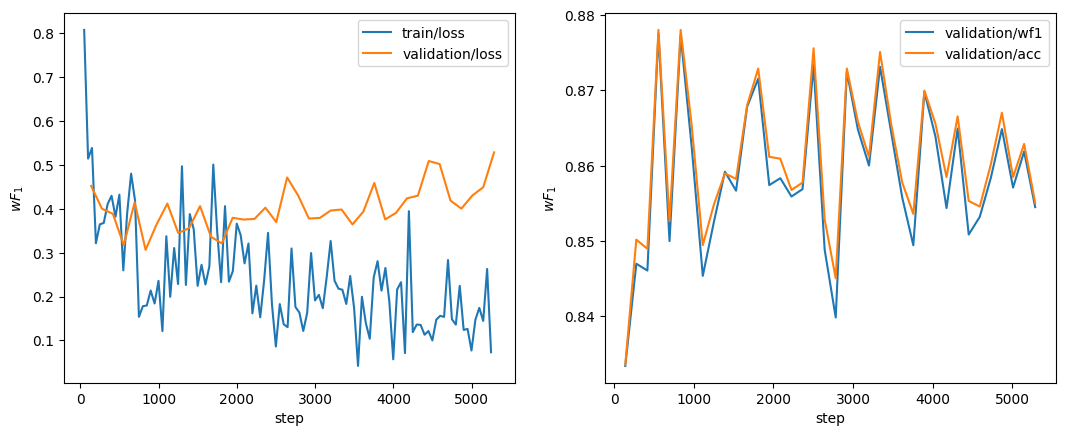

In [3]:
best_wf1 = max(experiments, key=lambda e: e.metrics['test/wf1'].values.max())

selection_ix = best_wf1.metrics['test/wf1'].argmax()
print(f'ID  = {best_wf1.to_dict()["_id"]}')
print(f'wf1 = {best_wf1.metrics["test/wf1"].values[selection_ix]:.03f}')
print(f'acc = {best_wf1.metrics["test/acc"].values[selection_ix]:.03f}')
print(f'Config: {best_wf1.to_dict()["config"]}')

fig, ax = plt.subplots(1,2)
fig.set_figwidth(fig.get_figwidth()*2)
best_wf1.metrics['train/loss'].plot(ax=ax[0])
best_wf1.metrics['validation/loss'].plot(ax=ax[0])
best_wf1.metrics['validation/wf1'].plot(ax=ax[1])
best_wf1.metrics['validation/acc'].plot(ax=ax[1])
for a in ax:
  a.legend()
  a.set_ylabel('$wF_1$')
_ = fig.show()